In [1]:
%matplotlib notebook

import re
import itertools

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import pockpy

# NOTE: This notebook assumes access to AFS

### Short summary of contents

This notebook showcases a simple example of how the available aperture and closed orbit in the machine can be computed from direct interaction with MAD-X.

In [2]:
# Specify the path to a MAD-X job defining HL-LHC optics
madx_filename = '/afs/cern.ch/eng/lhc/optics/HLLHCV1.5/examples/job_round.madx'

madx = pockpy.Madx()
madx.call(madx_filename)


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.05.01  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2019.06.07               +
  + Execution date: 2020.03.30 17:11:31      +
  ++++++++++++++++++++++++++++++++++++++++++++
option, warn,info;

system,"rm -rf temp"; system,"mkdir temp";

system,"ln -fns /afs/cern.ch/eng/lhc/optics/HLLHCV1.5 slhc";

system,"ln -fns /afs/cern.ch/eng/lhc/optics/runIII lhc";



Option, -echo,-warn,-info;

++++++ warning: implicit element re-definition ignored: marks.l1
++++++ warning: implicit element re-definition ignored: marke.l1
++++++ warning: implicit element re-definition ignored: marke.r1
++++++ warning: implicit element re-definition ignored: marks.r1
++++++ warning: implicit element re-definition ignored: marks.l5
++++++ warning: implicit element re-definition ignored: marke.l5
++++++ warning: implicit element re-definition ignored: marke.r5
++++++ warning: implicit element re-definition i

In [3]:
# Compute an aperture table for Beam 1
madx.use_sequence('LHCB1')
aperture_table = madx.compute_aperture_table(
    aperture_offset='/afs/cern.ch/eng/lhc/optics/HLLHCV1.5/aperture/offset.ip5.b1.tfs',
    co=2e-3,
    optics_type='round'
)

enter Twiss module

++++++ table: summ

length orbit5 alfa gammatr 
26658.8831999989 -0 0.000348550012100056 53.5633151899718 

q1 dq1 betxmax dxmax 
62.3100762356015 1.8354654561126 21589.9924312618 2.99445890472299 

dxrms xcomax xcorms q2 
1.46806624609255 0.0146015551113156 0.00141553144955565 60.3200707794788 

dq2 betymax dymax dyrms 
1.74886192434867 21540.5471758803 0.987322536632751 0.127084044066886 

ycomax ycorms deltap synch_1 
0.0146018044695903 0.00133237399023556 0 0 

synch_2 synch_3 synch_4 synch_5 
0 0 0 0 

nflips 
0 

Processing apertures from lhcb1$start:1 to lhcb1$end:1...
+++++++ deltap from TWISS            0

 Reading offsets from tfs "/afs/cern.ch/eng/lhc/optics/hllhcv1.5/aperture/offset.ip5.b1.tfs"


APERTURE LIMIT: mqxfa.b3r1:1, n1: 13.0196, at: 63.539



In [4]:
aperture_table

,N1,N1X_M,N1Y_M,APERTYPE,APER_1,APER_2,APER_3,APER_4,RTOL,XTOL,...,DY,X,Y,PX,PY,ON_AP,ON_ELEM,SPEC,APOFF_1,APOFF_2
LHCB1$START~0,999999.000000,999999.000000,999999.000000,CIRCLE,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.000875,-1.063456e-09,-0.00075,0.00025,9.163036e-08,-999999.0,1.0,0.0,0.0,0.0
ATLASPIPE1.R1~0,1756.106122,0.013704,0.013695,CIRCLE,0.023500,0.023500,0.023500,0.023500,0.00705,0.0,...,0.000875,-1.063456e-09,-0.00075,0.00025,9.163036e-08,1.0,1.0,0.0,0.0,0.0
IP1~0,1954.813613,0.015254,0.015245,CIRCLE,0.029000,0.029000,0.029000,0.029000,0.01100,0.0,...,0.000875,-1.063456e-09,-0.00075,0.00025,9.163036e-08,1.0,1.0,0.0,0.0,0.0
DRIFT_0~0,999999.000000,999999.000000,999999.000000,,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,-0.005557,9.244689e-05,-0.00075,0.00025,9.163036e-08,-999999.0,-999999.0,0.0,0.0,0.0
ATLASPIPE2.R1~0,660.670414,0.013707,0.013688,CIRCLE,0.023500,0.023500,0.023500,0.023500,0.00705,0.0,...,-0.005557,9.244689e-05,-0.00075,0.00025,9.163036e-08,1.0,1.0,0.0,0.0,0.0
DRIFT_1~0,999999.000000,999999.000000,999999.000000,,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,-0.011989,1.848923e-04,-0.00075,0.00025,9.163036e-08,-999999.0,-999999.0,0.0,0.0,0.0
ATLASPIPE3.R1~0,348.703777,0.013674,0.013668,CIRCLE,0.023500,0.023500,0.023500,0.023500,0.00705,0.0,...,-0.011989,1.848923e-04,-0.00075,0.00025,9.163036e-08,1.0,1.0,0.0,0.0,0.0
DRIFT_2~0,999999.000000,999999.000000,999999.000000,,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,-0.018422,2.773403e-04,-0.00075,0.00025,9.163036e-08,-999999.0,-999999.0,0.0,0.0,0.0
ATLASPIPE4.R1~0,234.337254,0.013630,0.013629,CIRCLE,0.023500,0.023500,0.023500,0.023500,0.00705,0.0,...,-0.018422,2.773403e-04,-0.00075,0.00025,9.163036e-08,1.0,1.0,0.0,0.0,0.0
DRIFT_3~0,999999.000000,999999.000000,999999.000000,,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,-0.024854,3.697883e-04,-0.00075,0.00025,9.163036e-08,-999999.0,-999999.0,0.0,0.0,0.0


In [5]:
# Scan over closed orbit uncertainties to compute the available orbit for Beam 1
# NOTE: May take in the order of 10 minutes, directly proportional to number of elements in co_li

aperture_scan_table = madx.available_aperture_scan(
    aperture_offset='/afs/cern.ch/eng/lhc/optics/HLLHCV1.5/aperture/offset.ip5.b1.tfs',
    co_li=np.linspace(2e-3, 4e-3, 11), # Closed orbit uncertainty to scan over
    optics_type='round',
    run_thrice=True # Runs the aperture command thrice, see documentation of method.
)

enter Twiss module

++++++ table: summ

length orbit5 alfa gammatr 
26658.8831999989 -0 0.000348522469697739 53.5654316004758 

q1 dq1 betxmax dxmax 
62.3104994335948 2.4045459143836 21669.2415775406 2.96542796673579 

dxrms xcomax xcorms q2 
1.46634152510447 0.0142806965773177 0.00142662383294638 60.3203341613624 

dq2 betymax dymax dyrms 
0.861493943792507 21525.837471703 0.984041604452948 0.127574561517131 

ycomax ycorms deltap synch_1 
0.0146881720600064 0.00133981759673686 0.0002 0 

synch_2 synch_3 synch_4 synch_5 
0 0 0 0 

nflips 
0 

Processing apertures from lhcb1$start:1 to lhcb1$end:1...
+++++++ deltap from TWISS       0.0002

 Reading offsets from tfs "/afs/cern.ch/eng/lhc/optics/hllhcv1.5/aperture/offset.ip5.b1.tfs"


APERTURE LIMIT: mqxfa.b3l5:1, n1: 13.1231, at: 13265.8

enter Twiss module

++++++ table: summ

length orbit5 alfa gammatr 
26658.8831999989 -0 0.000348577655434285 53.5611912758917 

q1 dq1 betxmax dxmax 
62.309767419496 1.24443470585759 21592.1893257951 3


Processing apertures from lhcb1$start:1 to lhcb1$end:1...
+++++++ deltap from TWISS       0.0002

 Reading offsets from tfs "/afs/cern.ch/eng/lhc/optics/hllhcv1.5/aperture/offset.ip5.b1.tfs"


APERTURE LIMIT: mqxfa.b3l5:1, n1: 12.9202, at: 13265.8

enter Twiss module

++++++ table: summ

length orbit5 alfa gammatr 
26658.8831999989 -0 0.000348577655434285 53.5611912758917 

q1 dq1 betxmax dxmax 
62.309767419496 1.24443470585759 21592.1893257951 3.02518652540642 

dxrms xcomax xcorms q2 
1.46999906861411 0.0149418274226583 0.00146574069354578 60.3196388877826 

dq2 betymax dymax dyrms 
2.56156744489402 21570.4242786694 0.989287219135568 0.126614734076451 

ycomax ycorms deltap synch_1 
0.0145155149580967 0.00132537106209676 -0.0002 0 

synch_2 synch_3 synch_4 synch_5 
0 0 0 0 

nflips 
0 

Processing apertures from lhcb1$start:1 to lhcb1$end:1...
+++++++ deltap from TWISS      -0.0002

 Reading offsets from tfs "/afs/cern.ch/eng/lhc/optics/hllhcv1.5/aperture/offset.ip5.b1.tfs"


APERTU

enter Twiss module

++++++ table: summ

length orbit5 alfa gammatr 
26658.8831999989 -0 0.000348550012100056 53.5633151899718 

q1 dq1 betxmax dxmax 
62.3100762356015 1.8354654561126 21589.9924312618 2.99445890472299 

dxrms xcomax xcorms q2 
1.46806624609255 0.0146015551113156 0.00141553144955565 60.3200707794788 

dq2 betymax dymax dyrms 
1.74886192434867 21540.5471758803 0.987322536632751 0.127084044066886 

ycomax ycorms deltap synch_1 
0.0146018044695903 0.00133237399023556 0 0 

synch_2 synch_3 synch_4 synch_5 
0 0 0 0 

nflips 
0 

Processing apertures from lhcb1$start:1 to lhcb1$end:1...
+++++++ deltap from TWISS            0

 Reading offsets from tfs "/afs/cern.ch/eng/lhc/optics/hllhcv1.5/aperture/offset.ip5.b1.tfs"


APERTURE LIMIT: mqxfa.b3r1:1, n1: 12.6141, at: 63.539

enter Twiss module

++++++ table: summ

length orbit5 alfa gammatr 
26658.8831999989 -0 0.000348522469697739 53.5654316004758 

q1 dq1 betxmax dxmax 
62.3104994335948 2.4045459143836 21669.2415775406 2.96542


Processing apertures from lhcb1$start:1 to lhcb1$end:1...
+++++++ deltap from TWISS      -0.0002

 Reading offsets from tfs "/afs/cern.ch/eng/lhc/optics/hllhcv1.5/aperture/offset.ip5.b1.tfs"


APERTURE LIMIT: mqxfa.b3r1:1, n1: 12.5319, at: 63.539

enter Twiss module

++++++ table: summ

length orbit5 alfa gammatr 
26658.8831999989 -0 0.000348550012100056 53.5633151899718 

q1 dq1 betxmax dxmax 
62.3100762356015 1.8354654561126 21589.9924312618 2.99445890472299 

dxrms xcomax xcorms q2 
1.46806624609255 0.0146015551113156 0.00141553144955565 60.3200707794788 

dq2 betymax dymax dyrms 
1.74886192434867 21540.5471758803 0.987322536632751 0.127084044066886 

ycomax ycorms deltap synch_1 
0.0146018044695903 0.00133237399023556 0 0 

synch_2 synch_3 synch_4 synch_5 
0 0 0 0 

nflips 
0 

Processing apertures from lhcb1$start:1 to lhcb1$end:1...
+++++++ deltap from TWISS            0

 Reading offsets from tfs "/afs/cern.ch/eng/lhc/optics/hllhcv1.5/aperture/offset.ip5.b1.tfs"


APERTURE LIMI

In [6]:
aperture_scan_table

,N1,N1X_M,N1Y_M,N1,N1X_M,N1Y_M,N1,N1X_M,N1Y_M,N1,...,N1Y_M,N1,N1X_M,N1Y_M,N1,N1X_M,N1Y_M,N1,N1X_M,N1Y_M
,0.0020,0.0020,0.0020,0.0022,0.0022,0.0022,0.0024,0.0024,0.0024,0.0026,...,0.0034,0.0036,0.0036,0.0036,0.0038,0.0038,0.0038,0.0040,0.0040,0.0040
LHCB1$START~0,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,...,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000
ATLASPIPE1.R1~0,1755.512951,0.013680,0.013695,1729.882622,0.013480,0.013495,1704.252293,0.013280,0.013295,1678.621965,...,0.012295,1550.470321,0.012082,0.012095,1524.839993,0.011882,0.011896,1499.209664,0.011683,0.011696
IP1~0,1954.147998,0.015228,0.015245,1928.517670,0.015028,0.015045,1902.887341,0.014828,0.014845,1877.257012,...,0.013845,1749.105369,0.013630,0.013645,1723.475040,0.013430,0.013445,1697.844711,0.013230,0.013245
DRIFT_0~0,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,...,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000
ATLASPIPE2.R1~0,658.515146,0.013579,0.013688,648.895725,0.013381,0.013488,639.276304,0.013182,0.013288,629.656883,...,0.012288,581.559779,0.011992,0.012088,571.940358,0.011794,0.011888,562.320937,0.011595,0.011688
DRIFT_1~0,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,...,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000
ATLASPIPE3.R1~0,348.415621,0.013606,0.013662,343.322950,0.013407,0.013463,338.230278,0.013208,0.013263,333.137607,...,0.012266,307.674250,0.012015,0.012066,302.581579,0.011816,0.011867,297.488908,0.011617,0.011667
DRIFT_2~0,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,...,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000
ATLASPIPE4.R1~0,234.301469,0.013582,0.013628,230.869425,0.013383,0.013428,227.437381,0.013184,0.013229,224.005337,...,0.012231,206.845117,0.011990,0.012031,203.413073,0.011791,0.011832,199.981029,0.011592,0.011632


<IPython.core.display.Javascript object>


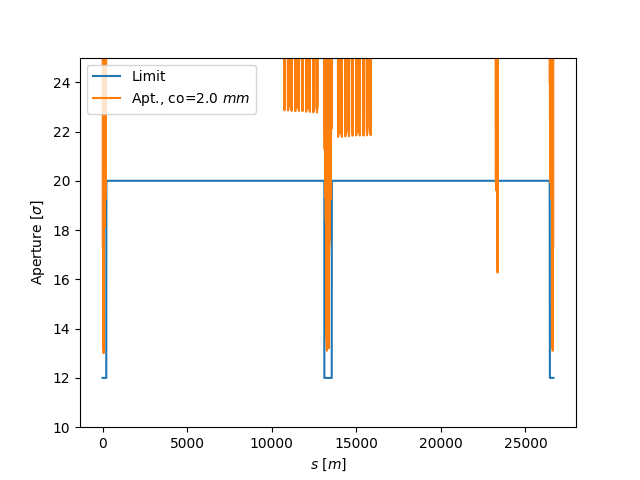

In [7]:
# Relate the available aperture to some limit

# Define said limit
default_aperture = 20
ir_aperture = 12

aperture_limit = pd.Series(default_aperture, index=aperture_table.index)
special_sections = [('TCTPH.6L5.B1~0', 'TCL.6R5.B1~0'), ('LHCB1$START~0', 'TCL.6R1.B1~0'), ('TCTPH.6L1.B1~0', 'LHCB1$END~0')]
for section in special_sections:
    start, end = section
    s_start, s_end = aperture_table.at[start, 'S'], aperture_table.at[end, 'S']
    aperture_limit[aperture_table['S'].between(s_start, s_end)] = ir_aperture
    
plt.figure()
plt.plot(aperture_table['S'], aperture_limit, label='Limit')

co = 2e-3
plt.plot(aperture_table['S'], aperture_scan_table.loc[:, ('N1', co)], label=f'Apt., co={1e3*co} $mm$')
plt.ylim(10, 25)

plt.xlabel('$s$ [$m$]')
plt.ylabel('Aperture [$\sigma$]')

plt.legend()
plt.show()

<IPython.core.display.Javascript object>


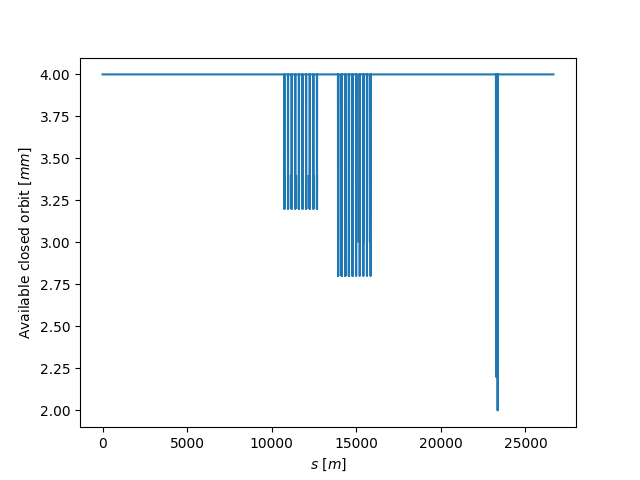

In [8]:
# Compute the available closed orbit given the aperture limit
# (clipped to the range of co_li)

available_orbit = pockpy.utils.compute_available_closed_orbit(aperture_scan_table, aperture_limit)

plt.figure()
plt.plot(aperture_table['S'], 1e3*available_orbit)

plt.xlabel('$s$ [$m$]')
plt.ylabel('Available closed orbit [$mm$]')
plt.show()
